In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline
from sklearn.impute import SimpleImputer 
import sqlite3 as sql 
from IPython.display import display 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import gc

### Import Data

In [2]:
pathPowerWithPLZ= './Data created autom/' + "clean_PLZ_" + 'competitor_market_prices_power.csv'
pathGasWithPLZ = './Data created autom/' + "clean_PLZ_" + 'competitor_market_prices_gas.csv'

#df_Gas = pd.read_csv(pathGasWithPLZ, nrows = 1000)
df_Gas = pd.read_csv(pathGasWithPLZ)

display(df_Gas)

Unnamed: 0 date_valid_to date_valid_from  post_code     city energy  \
0                  0    2021-09-01      2021-05-21       1309  Dresden    gas   
1                  1    2021-09-01      2021-05-21       1309  Dresden    gas   
2                  2    2021-09-01      2021-05-21       1309  Dresden    gas   
3                  3    2021-09-01      2021-05-21       1309  Dresden    gas   
4                  4    2021-09-01      2021-05-21       1309  Dresden    gas   
...              ...           ...             ...        ...      ...    ...   
21809920    18287483    9999-12-31      2022-10-15      99089   Erfurt    gas   
21809921    18287484    9999-12-31      2022-10-15      99089   Erfurt    gas   
21809922    18287485    9999-12-31      2022-10-15      99089   Erfurt    gas   
21809923    18287486    9999-12-31      2022-10-15      99089   Erfurt    gas   
21809924    18287487    9999-12-31      2022-10-15      99089   Erfurt    gas   

          consumption_range_kwh supplier      tariff  rank  price_year_eur  \
0                          1000  Levante    Sawsbuck   1.0          131.30   
1                          1500  Levante    Sawsbuck   1.0          160.95   
2                          2000  Levante    Sawsbuck   1.0          190.60   
3                          2300  Levante    Sawsbuck   1.0          208.39   
4                          2500  Levante    Sawsbuck   1.0          220.25   
...                         ...      ...         ...   ...             ...   
21809920                 500000    Belat  Carracosta   5.0       149087.87   
21809921                 500000  Pulenat   Araquanid   6.0       149525.13   
21809922                 500000  Pulenat  Perrserker   4.0       148990.13   
21809923                 500000    Sarma   Aegislash   2.0       145733.08   
21809924                 500000    Sarma    Ampharos   3.0       146178.08   

         Bundesland   Latitude  Longitude  
0           Sachsen  51.049220  13.789432  
1           Sachsen  51.049220  13.789432  
2           Sachsen  51.049220  13.789432  
3           Sachsen  51.049220  13.789432  
4           Sachsen  51.049220  13.789432  
...             ...        ...        ...  
21809920  Thüringen  50.997284  11.014802  
21809921  Thüringen  50.997284  11.014802  
21809922  Thüringen  50.997284  11.014802  
21809923  Thüringen  50.997284  11.014802  
21809924  Thüringen  50.997284  11.014802  

[21809925 rows x 14 columns]

Count nr of entries per Bundesland

In [3]:
#print(df_Gas['consumption_range_kwh'].unique())
df_Gas.consumption_range_kwh.value_counts()

18000     973074
20000     970071
17000     961622
25000     957720
22500     950469
24000     947541
15000     942598
30000     941604
12000     940700
35000     936774
40000     921929
10000     911082
45000     903967
7000      855636
5000      798022
50000     776779
60000     685718
70000     660426
80000     611659
90000     605270
100000    547718
3800      439639
3000      416728
150000    399076
2300      389495
2000      388478
2500      388474
1500      367707
200000    365431
250000    348864
1000      311524
500000    194130
Name: consumption_range_kwh, dtype: int64

In [4]:
print("Gas: ")
df_Gas.Bundesland.value_counts()

Gas: 


Nordrhein-Westfalen       6302479
Niedersachsen             3681539
Baden-Württemberg         2888243
Bayern                    1274560
Schleswig-Holstein        1264882
Sachsen                   1236453
Rheinland-Pfalz           1071028
Hessen                     903991
Mecklenburg-Vorpommern     702051
Sachsen-Anhalt             536722
Thüringen                  526759
Bremen                     521383
Brandenburg                353728
Hamburg                    182994
Saarland                   181644
Berlin                     181469
Name: Bundesland, dtype: int64

Result:
Gas: 
Nordrhein-Westfalen       6302479
Niedersachsen             3681539
Baden-Württemberg         2888243
Bayern                    1274560
Schleswig-Holstein        1264882
Sachsen                   1236453
Rheinland-Pfalz           1071028
Hessen                     903991
Mecklenburg-Vorpommern     702051
Sachsen-Anhalt             536722
Thüringen                  526759
Bremen                     521383
Brandenburg                353728
Hamburg                    182994
Saarland                   181644
Berlin                     181469
Name: Bundesland, dtype: int64

## Karte

In [5]:
import plotly.express as px

#convert to numeric
df_Gas['Longitude']= pd.to_numeric(df_Gas['Longitude'])
df_Gas['Latitude']= pd.to_numeric(df_Gas['Latitude'])
df_Gas['price_year_eur']= pd.to_numeric(df_Gas['price_year_eur'])
df_Gas['consumption_range_kwh']= pd.to_numeric(df_Gas['consumption_range_kwh'])
df_Gas['pricePerKwh'] = df_Gas['price_year_eur'] / df_Gas['consumption_range_kwh']

In [6]:
# create temp df for heatmap
tempGas = df_Gas[['post_code', 'consumption_range_kwh' ,'Longitude', 'Latitude', 'price_year_eur', 'supplier', 'pricePerKwh']]
tempGas

post_code  consumption_range_kwh  Longitude   Latitude  \
0              1309                   1000  13.789432  51.049220   
1              1309                   1500  13.789432  51.049220   
2              1309                   2000  13.789432  51.049220   
3              1309                   2300  13.789432  51.049220   
4              1309                   2500  13.789432  51.049220   
...             ...                    ...        ...        ...   
21809920      99089                 500000  11.014802  50.997284   
21809921      99089                 500000  11.014802  50.997284   
21809922      99089                 500000  11.014802  50.997284   
21809923      99089                 500000  11.014802  50.997284   
21809924      99089                 500000  11.014802  50.997284   

          price_year_eur supplier  pricePerKwh  
0                 131.30  Levante     0.131300  
1                 160.95  Levante     0.107300  
2                 190.60  Levante     0.095300  
3                 208.39  Levante     0.090604  
4                 220.25  Levante     0.088100  
...                  ...      ...          ...  
21809920       149087.87    Belat     0.298176  
21809921       149525.13  Pulenat     0.299050  
21809922       148990.13  Pulenat     0.297980  
21809923       145733.08    Sarma     0.291466  
21809924       146178.08    Sarma     0.292356  

[21809925 rows x 7 columns]

In [7]:
# df we are using
tempGas['Count']= 0

# just look for specific consumption ranges? then filter here according to the one we want
#enter 0 to include all consumptionRanges
filterNow = False

if filterNow == True:
    inputConsole = int(input())
    spec_consumptionRange = 0
    spec_consumptionRange = inputConsole

    if spec_consumptionRange!= 0:
        tempGas= tempGas.loc[tempGas['consumption_range_kwh'] == spec_consumptionRange]

    tempGas

C:\Users\domin\AppData\Local\Temp\ipykernel_3228\2236779527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempGas['Count']= 0


In [8]:
#groupby and count
tempGas = tempGas.groupby(['post_code'], as_index=False).agg({'Longitude': 'first', 'Latitude': 'first', 'consumption_range_kwh':pd.Series.nunique ,'supplier':pd.Series.nunique, 'pricePerKwh':'mean', 'Count':'count'})
tempGas = tempGas.rename(columns={'consumption_range_kwh': 'UNIQUE_consumption_range_kwh', 'supplier': 'UNIQUE_supplier', 'pricePerKwh':'MEAN_pricePerKwh'})

tempGas= tempGas.sort_values(by='Count', ascending=False)
display(tempGas)

post_code  Longitude   Latitude  UNIQUE_consumption_range_kwh  \
15      21423  10.235151  53.306147                            32   
19      24109  10.049664  54.317863                            32   
26      31789   9.381149  52.100464                            32   
84      72108   9.006086  48.512508                            32   
8        8523  12.094614  50.481930                            32   
..        ...        ...        ...                           ...   
55      47441   6.623289  51.448049                            32   
1        3046  14.310908  51.758849                            32   
22      27753   8.611464  53.054392                            32   
35      38640  10.433162  51.909708                            32   
39      41462   6.662944  51.216840                            32   

    UNIQUE_supplier  MEAN_pricePerKwh    Count  
15               94          0.156572  1054929  
19               90          0.169697   725328  
26               87          0.158178   695272  
84               87          0.157170   528324  
8                82          0.156618   511182  
..              ...               ...      ...  
55               87          0.159828   173217  
1                90          0.160587   173136  
22               83          0.158444   172506  
35               86          0.152932   171706  
39               90          0.158489   171264  

[100 rows x 7 columns]

In [9]:
#create map Gas
tempGas.describe()

post_code   Longitude    Latitude  UNIQUE_consumption_range_kwh  \
count    100.000000  100.000000  100.000000                         100.0   
mean   46487.970000    9.126015   51.088920                          32.0   
std    23803.675129    2.051389    1.495092                           0.0   
min     1309.000000    6.104425   48.003815                          32.0   
25%    30957.500000    7.299530   50.057488                          32.0   
50%    45573.000000    8.651657   51.326845                          32.0   
75%    63374.000000   10.514736   51.927903                          32.0   
max    99089.000000   14.310908   54.317863                          32.0   

       UNIQUE_supplier  MEAN_pricePerKwh         Count  
count       100.000000        100.000000  1.000000e+02  
mean         90.260000          0.159155  2.180992e+05  
std           3.416005          0.003771  1.283141e+05  
min          82.000000          0.151289  1.712640e+05  
25%          88.000000          0.156776  1.771720e+05  
50%          90.000000          0.158983  1.804325e+05  
75%          92.000000          0.161460  1.841182e+05  
max          99.000000          0.170776  1.054929e+06

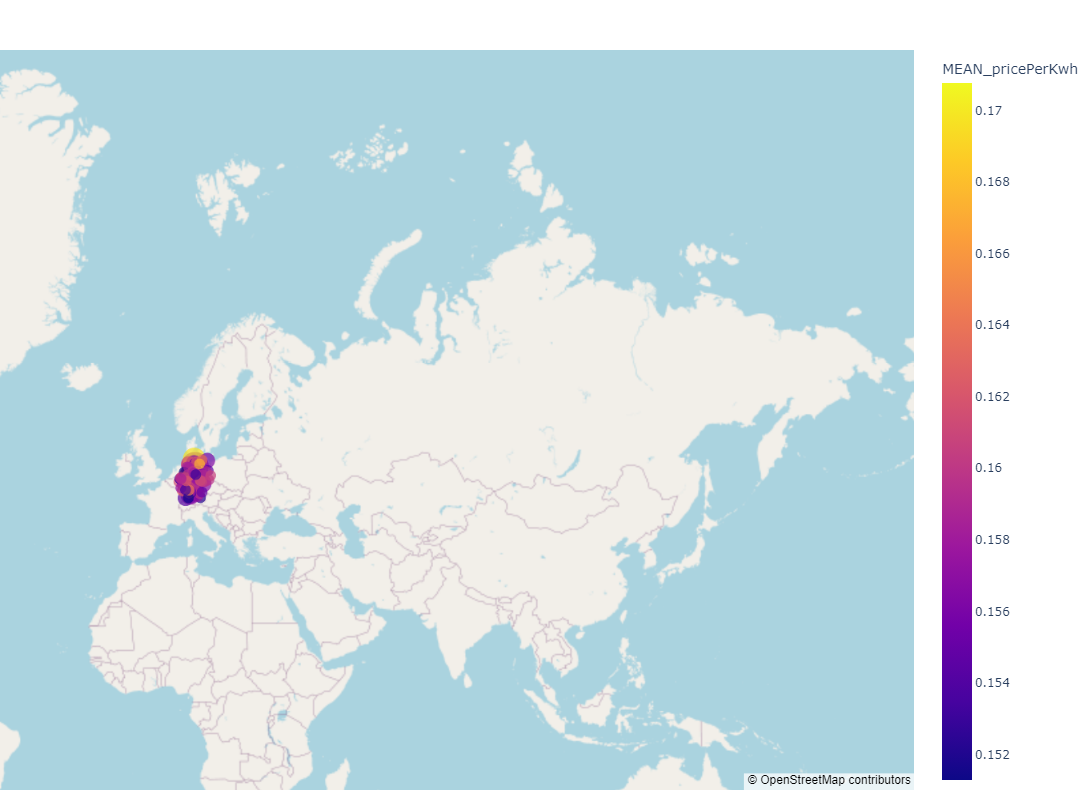

In [10]:
fig = px.scatter_mapbox(tempGas, 
                        lon = tempGas['Longitude'],
                        lat = tempGas['Latitude'],
                        zoom = 5,
                        color = tempGas['MEAN_pricePerKwh'],
                        size = tempGas['Count'],
                        #size = tempGas['UNIQUE_supplier'],
                        #size = tempGas['UNIQUE_consumption_range_kwh'],
                        width = 1200,
                        height = 800,
                       )

fig.update_layout(mapbox_style= "open-street-map")
fig.update_layout(margin={"r":0, "t":50, "l":0, "b":10})
fig.show()

In [11]:
df_Gas = 5
gc.collect()

50

### Power

In [12]:
df_Pow = pd.read_csv(pathPowerWithPLZ)
#df_Pow = pd.read_csv(pathPowerWithPLZ, nrows = 100000)
display(df_Pow)

print("Power: ")
df_Pow.Bundesland.value_counts()

Unnamed: 0 date_valid_to date_valid_from  post_code     city energy  \
0                  0    2021-09-01      2021-06-02      14480  Potsdam  power   
1                  1    2021-09-01      2021-06-09      14480  Potsdam  power   
2                  2    2021-09-01      2021-07-10      14480  Potsdam  power   
3                  3    2021-09-01      2021-07-10      14480  Potsdam  power   
4                  4    2021-09-01      2021-07-10      14480  Potsdam  power   
...              ...           ...             ...        ...      ...    ...   
39700071    33161801    9999-12-31      2022-10-15      99089   Erfurt  power   
39700072    33161802    9999-12-31      2022-10-15      99089   Erfurt  power   
39700073    33161803    9999-12-31      2022-10-15      99089   Erfurt  power   
39700074    33161804    9999-12-31      2022-10-15      99089   Erfurt  power   
39700075    33161805    9999-12-31      2022-10-15      99089   Erfurt  power   

          consumption_range_kwh  supplier    tariff  rank  price_year_eur  \
0                          3500   Galerne  Skiploom   1.0          878.86   
1                          2800   Galerne  Skiploom   1.0          678.69   
2                          7500   Galerne  Skiploom   1.0         2022.68   
3                          7800   Galerne  Skiploom   1.0         2108.47   
4                          8000   Galerne  Skiploom   1.0         2165.66   
...                         ...       ...       ...   ...             ...   
39700071                  12000     Werra   Banette   9.0         9257.05   
39700072                  12000     Werra  Meditite  12.0         9375.86   
39700073                  20000  Lule älv    Pidove   7.0        15292.50   
39700074                  20000    Sirkos  Magikarp   2.0        13567.83   
39700075                  20000     Werra  Meditite   8.0        15448.66   

           Bundesland   Latitude  Longitude  
0         Brandenburg  52.374283  13.134662  
1         Brandenburg  52.374283  13.134662  
2         Brandenburg  52.374283  13.134662  
3         Brandenburg  52.374283  13.134662  
4         Brandenburg  52.374283  13.134662  
...               ...        ...        ...  
39700071    Thüringen  50.997284  11.014802  
39700072    Thüringen  50.997284  11.014802  
39700073    Thüringen  50.997284  11.014802  
39700074    Thüringen  50.997284  11.014802  
39700075    Thüringen  50.997284  11.014802  

[39700076 rows x 14 columns]

Power: 


Nordrhein-Westfalen       11433616
Niedersachsen              6824985
Baden-Württemberg          5283221
Bayern                     2297779
Schleswig-Holstein         2280445
Sachsen                    2238285
Rheinland-Pfalz            1943731
Hessen                     1619789
Mecklenburg-Vorpommern     1276180
Sachsen-Anhalt              969528
Thüringen                   962741
Bremen                      955632
Brandenburg                 656337
Saarland                    323427
Berlin                      319154
Hamburg                     315226
Name: Bundesland, dtype: int64

In [ ]:
import plotly.express as px

#convert to numeric
df_Pow['Longitude']= pd.to_numeric(df_Pow['Longitude'])
df_Pow['Latitude']= pd.to_numeric(df_Pow['Latitude'])
df_Pow['price_year_eur']= pd.to_numeric(df_Pow['price_year_eur'])
df_Pow['consumption_range_kwh']= pd.to_numeric(df_Pow['consumption_range_kwh'])
df_Pow['pricePerKwh'] = df_Pow['price_year_eur'] / df_Pow['consumption_range_kwh']

# create temp df for heatmap
tempGas = df_Pow[['post_code', 'consumption_range_kwh' ,'Longitude', 'Latitude', 'price_year_eur', 'supplier', 'pricePerKwh']]
tempGas

In [ ]:
# df we are using
tempGas['Count']= 0

# just look for specific consumption ranges? then filter here according to the one we want
#enter 0 to include all consumptionRanges
filterNow = False

if filterNow == True:
    inputConsole = int(input())
    spec_consumptionRange = 0
    spec_consumptionRange = inputConsole

    if spec_consumptionRange!= 0:
        tempGas= tempGas.loc[tempGas['consumption_range_kwh'] == spec_consumptionRange]

    tempGas

In [ ]:
#groupby and count

#taking avg() consumption_range!
tempGas = tempGas.groupby(['post_code'], as_index=False).agg({'Longitude': 'first', 'Latitude': 'first', 'consumption_range_kwh':pd.Series.nunique ,'supplier':pd.Series.nunique, 'pricePerKwh':'mean', 'Count':'count'})
tempGas = tempGas.rename(columns={'consumption_range_kwh': 'UNIQUE_consumption_range_kwh', 'supplier': 'UNIQUE_supplier', 'pricePerKwh':'MEAN_pricePerKwh'})

tempGas= tempGas.sort_values(by='Count', ascending=False)
display(tempGas)

C:\Users\domin\AppData\Local\Temp\ipykernel_3228\2135107488.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



post_code  Longitude   Latitude  UNIQUE_consumption_range_kwh  \
15      21423  10.235151  53.306147                            30   
26      31789   9.381149  52.100464                            30   
19      24109  10.049664  54.317863                            30   
84      72108   9.006086  48.512508                            30   
8        8523  12.094614  50.481930                            30   
..        ...        ...        ...                           ...   
58      48429   7.459713  52.286789                            30   
16      22159  10.118761  53.613818                            30   
79      67663   7.795766  49.421159                            30   
37      40625   6.855736  51.231373                            30   
96      90763  10.994007  49.456176                            30   

    UNIQUE_supplier  MEAN_pricePerKwh    Count  
15              106          0.505233  1947795  
26               99          0.505380  1345416  
19              104          0.501863  1288918  
84               96          0.533370  1027869  
8               100          0.494485   955323  
..              ...               ...      ...  
58               99          0.511005   315763  
16              109          0.530031   315226  
79               96          0.503631   314027  
37              105          0.477928   312856  
96              107          0.482656   311979  

[100 rows x 7 columns]

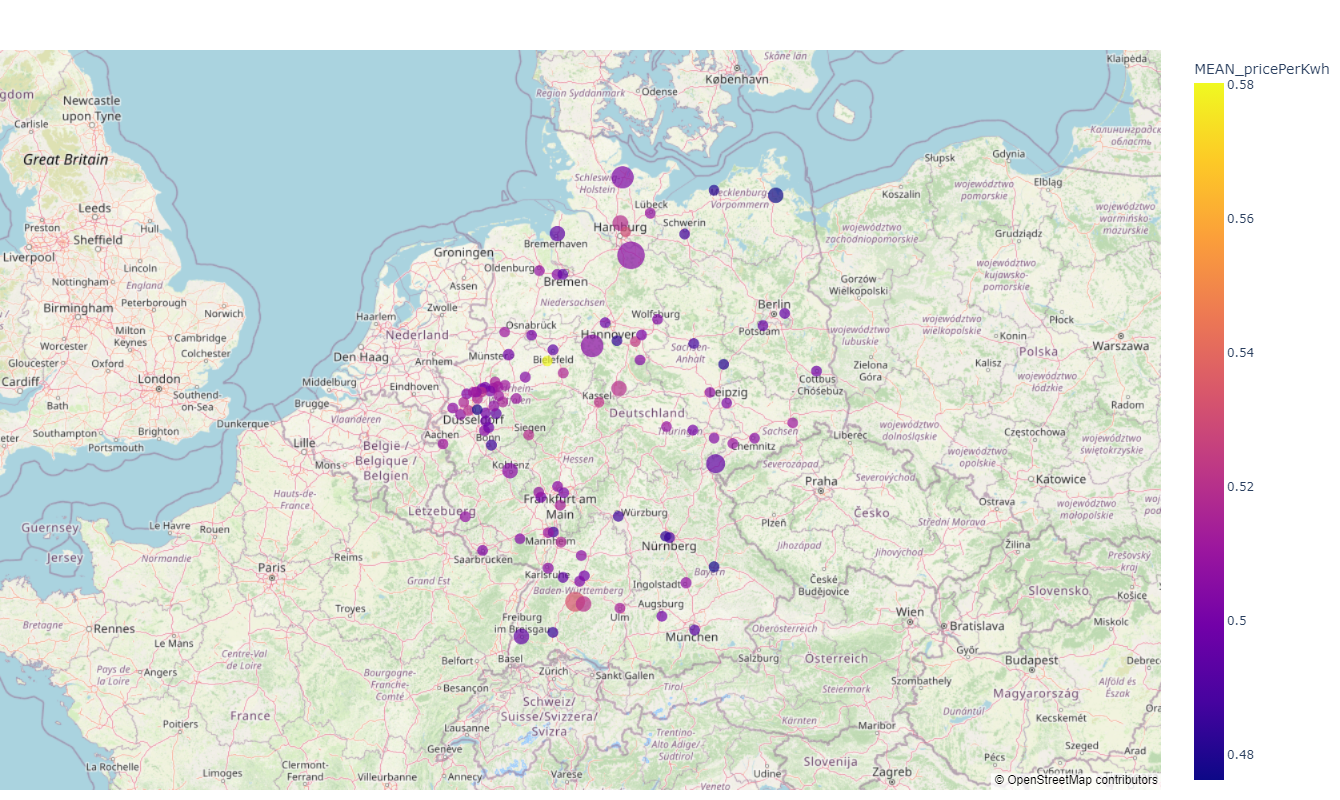

In [13]:
fig = px.scatter_mapbox(tempGas, 
                        lon = tempGas['Longitude'],
                        lat = tempGas['Latitude'],
                        zoom = 5,
                        color = tempGas['MEAN_pricePerKwh'],
                        size = tempGas['Count'],
                        #size = tempGas['UNIQUE_supplier'],
                        #size = tempGas['UNIQUE_consumption_range_kwh'],
                        width = 1200,
                        height = 800,
                       )

fig.update_layout(mapbox_style= "open-street-map")
fig.update_layout(margin={"r":0, "t":50, "l":0, "b":10})
fig.show()

Results:
Nordrhein-Westfalen       11433616
Niedersachsen              6824985
Baden-Württemberg          5283221
Bayern                     2297779
Schleswig-Holstein         2280445
Sachsen                    2238285
Rheinland-Pfalz            1943731
Hessen                     1619789
Mecklenburg-Vorpommern     1276180
Sachsen-Anhalt              969528
Thüringen                   962741
Bremen                      955632
Brandenburg                 656337
Saarland                    323427
Berlin                      319154
Hamburg                     315226
Name: Bundesland, dtype: int64